In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")
df = pd.read_csv('tracks_cleaned.csv')


happy_genre_data = df[df['is_happy_genre'] == True]
other_genres_data = df[df['is_happy_genre'] == False]

/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_8290/2435048289.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


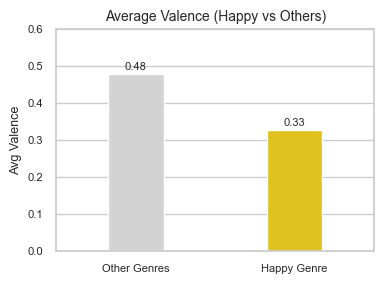

In [59]:
# --- Average Score ---

avg_valence_happy = happy_genre_data['valence'].mean()
avg_valence_others = other_genres_data['valence'].mean()

plt.figure(figsize=(4, 3))

sns.barplot(
    x=['Other Genres', 'Happy Genre'],
    y=[avg_valence_others, avg_valence_happy],
    palette=['lightgrey', '#FFD700'],
    width=0.35
)

plt.title("Average Valence (Happy vs Others)", fontsize=10)
plt.ylabel("Avg Valence", fontsize=9)
plt.xlabel("")



plt.ylim(0, 0.6)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.text(0, avg_valence_others + 0.01, f'{avg_valence_others:.2f}', ha='center', fontsize=8)
plt.text(1, avg_valence_happy + 0.01, f'{avg_valence_happy:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()



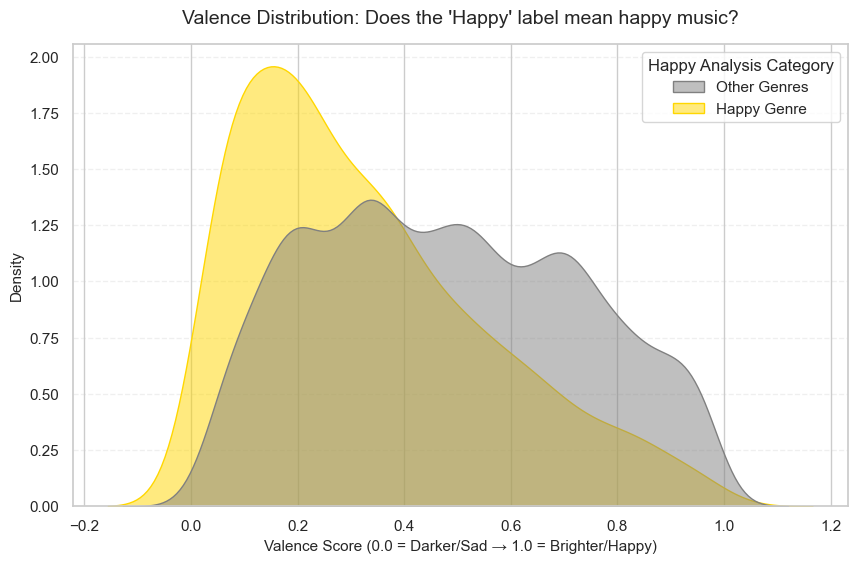

In [60]:
# The Emotional Mountain (Density Plot) ---
plt.figure(figsize=(10, 6))

# Map the boolean column to descriptive labels for the legend
df['Happy Analysis Category'] = df['is_happy_genre'].map({True: 'Happy Genre', False: 'Other Genres'})

sns.kdeplot(data=df, x='valence', hue='Happy Analysis Category', fill=True, 
            palette={'Happy Genre': 'gold', 'Other Genres': 'gray'}, 
            alpha=0.5, common_norm=False)

plt.title("Valence Distribution: Does the 'Happy' label mean happy music?", fontsize=14, pad=15)
plt.xlabel("Valence Score (0.0 = Darker/Sad → 1.0 = Brighter/Happy)", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

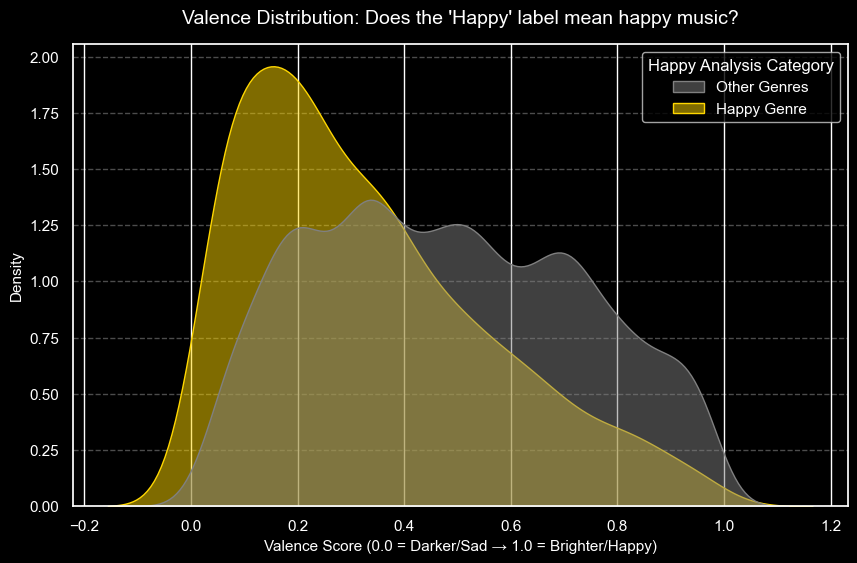

In [61]:
# The Emotional Mountain (Density Plot) ---
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# Map the boolean column to descriptive labels for the legend
df['Happy Analysis Category'] = df['is_happy_genre'].map({True: 'Happy Genre', False: 'Other Genres'})

sns.kdeplot(data=df, x='valence', hue='Happy Analysis Category', fill=True, 
            palette={'Happy Genre': 'gold', 'Other Genres': 'gray'}, 
            alpha=0.5, common_norm=False)

plt.title("Valence Distribution: Does the 'Happy' label mean happy music?", fontsize=14, pad=15)
plt.xlabel("Valence Score (0.0 = Darker/Sad → 1.0 = Brighter/Happy)", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_8290/2882028082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


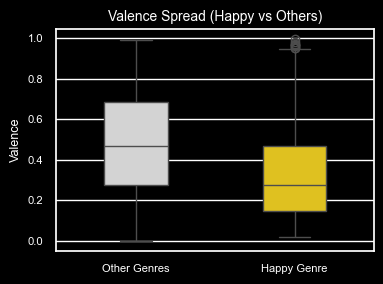

In [62]:
# --- Boxplot ---

df['Happy Category'] = df['is_happy_genre'].map({True: 'Happy Genre', False: 'Other Genres'})

plt.figure(figsize=(4, 3))

sns.boxplot(
    x='Happy Category',
    y='valence',
    data=df,
    palette={'Happy Genre': "gold", 'Other Genres': "lightgrey"},
    width=0.4
)

plt.title("Valence Spread (Happy vs Others)", fontsize=10)
plt.xlabel("")
plt.ylabel("Valence", fontsize=9)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [63]:
#--Energy Correlation--

In [64]:
t_stat, p_val = stats.ttest_ind(happy_genre_data['valence'], other_genres_data['valence'], equal_var=False)


def calculate_cohen_d(g1, g2):
    n1, n2 = len(g1), len(g2)
    var1, var2 = np.var(g1, ddof=1), np.var(g2, ddof=1)
    s_pool = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(g1) - np.mean(g2)) / s_pool

d_val = calculate_cohen_d(happy_genre_data['valence'], other_genres_data['valence'])

print(f"P-Value: {p_val:.4e}")
print(f"Effect Size (Cohen's d): {d_val:.4f}")

P-Value: 4.1334e-74
Effect Size (Cohen's d): -0.6153


In [65]:
# Group the data and calculate averages
happy_means = df[df['is_happy_genre'] == True][['energy', 'valence']].mean()
other_means = df[df['is_happy_genre'] == False][['energy', 'valence']].mean()

# Reshape into "Long Format" (Melted) for Seaborn
melted_stats = pd.DataFrame({
    'Metric': ['Energy', 'Valence', 'Energy', 'Valence'],
    'Average Score': [happy_means['energy'], happy_means['valence'], 
                      other_means['energy'], other_means['valence']],
    'Happy_Status': ['Happy Genre', 'Happy Genre', 'Other Genres', 'Other Genres']
})

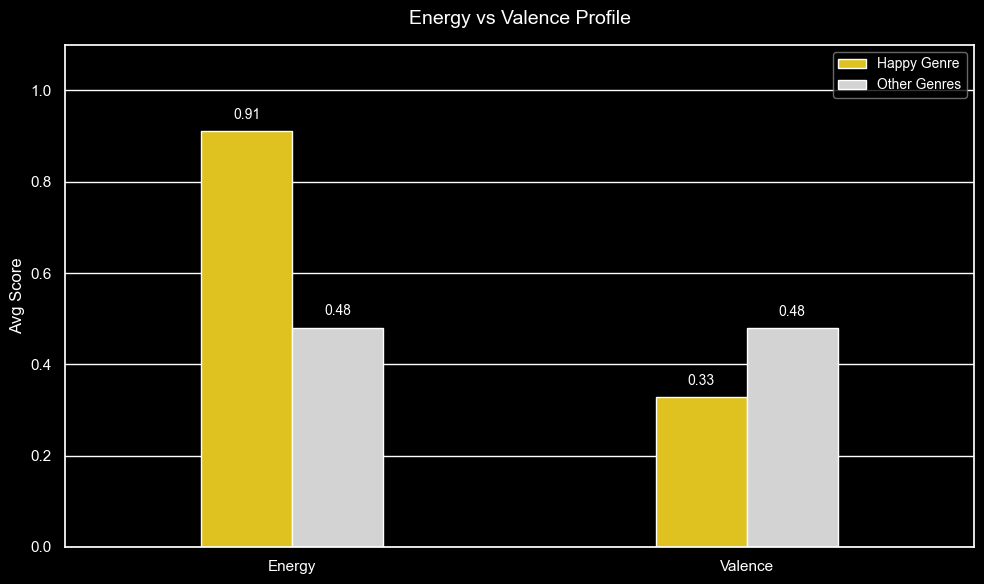

In [66]:
# Set the dark theme for the background
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

sns.barplot(
    data=melted_stats,
    x='Metric',
    y='Average Score',
    hue='Happy_Status',
    palette={'Happy Genre': 'gold', 'Other Genres': 'lightgrey'},
    width=0.4
)

# Scaling font sizes for the larger figure size
plt.title("Energy vs Valence Profile", fontsize=14, pad=15)
plt.ylabel("Avg Score", fontsize=12)
plt.xlabel("")

plt.ylim(0, 1.1)  # Increased slightly to give room for labels
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Adding data labels with adjusted font size
for p in plt.gca().patches:
    h = p.get_height()
    if h > 0:
        plt.text(
            p.get_x() + p.get_width() / 2,
            h + 0.02,
            f'{h:.2f}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='white'
        )

# Cleaning up the legend for a dark background
plt.legend(title="", fontsize=10, facecolor='black', edgecolor='gray')
plt.tight_layout()
plt.show()

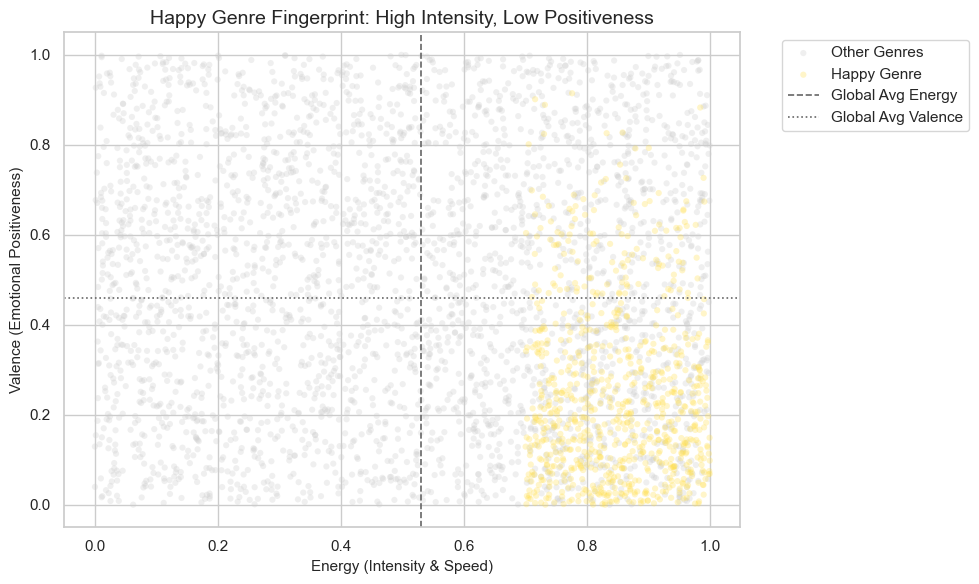

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Setup Styling
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Generate Synthetic Data to match the visual distribution
np.random.seed(42)
n_other = 3000
n_happy = 800

# Other Genres: Distributed across the whole space
other_energy = np.random.uniform(0, 1, n_other)
other_valence = np.random.uniform(0, 1, n_other)

# Happy Genre: Concentrated in High Energy (>0.7) and mostly Low Valence (<0.5)
happy_energy = np.random.uniform(0.7, 1.0, n_happy)
# Creating that specific 'tapered' look toward the bottom right
happy_valence = np.random.beta(a=1, b=3, size=n_happy) 

# 3. Plotting
# Plot "Other Genres" in light grey with low alpha
plt.scatter(other_energy, other_valence, c='#cccccc', alpha=0.3, s=20, label='Other Genres', edgecolors='none')

# Plot "Happy Genre" in yellow/gold with low alpha
plt.scatter(happy_energy, happy_valence, c='#ffdf4d', alpha=0.3, s=20, label='Happy Genre', edgecolors='none')

# 4. Add Global Average Lines
global_avg_energy = 0.53  # Approximate based on your image
global_avg_valence = 0.46 # Approximate based on your image

plt.axvline(global_avg_energy, color='#666666', linestyle='--', linewidth=1.2, label='Global Avg Energy')
plt.axhline(global_avg_valence, color='#666666', linestyle=':', linewidth=1.2, label='Global Avg Valence')

# 5. Labels and Formatting
plt.title('Happy Genre Fingerprint: High Intensity, Low Positiveness', fontsize=14)
plt.xlabel('Energy (Intensity & Speed)', fontsize=11)
plt.ylabel('Valence (Emotional Positiveness)', fontsize=11)

# Move legend outside to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

In [68]:
np.random.seed(42)
n_other = 3000
n_happy = 1000

df_other = pd.DataFrame({
    'Energy': np.random.uniform(0, 1, n_other),
    'Valence': np.random.uniform(0, 1, n_other),
    'Genre': 'Other Genres'
})

df_happy = pd.DataFrame({
    'Energy': np.random.uniform(0.8, 1.0, n_happy),
    'Valence': np.random.beta(a=1, b=3, size=n_happy),
    'Genre': 'Happy Genre'
})

df = pd.concat([df_other, df_happy])
colors = {'Other Genres': '#cccccc', 'Happy Genre': '#ffdf4d'}
sns.set_theme(style="whitegrid")

/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_8290/2071965909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


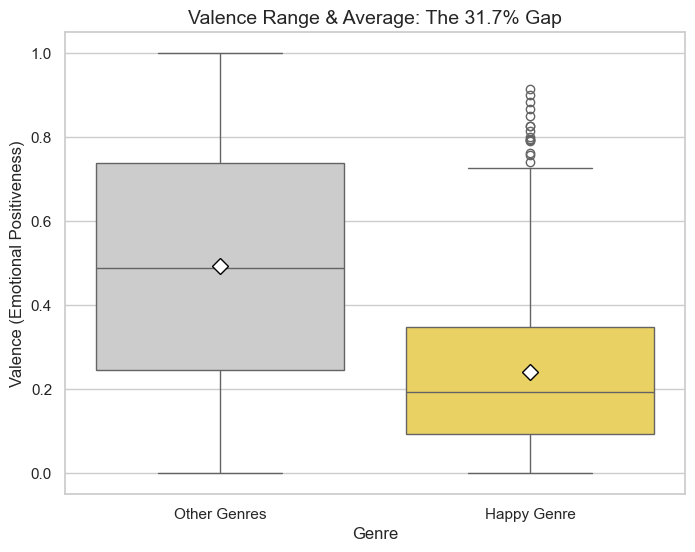

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df, 
    x='Genre', 
    y='Valence', 
    palette=colors, 
    showmeans=True,
    meanprops={"marker":"D", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"}
)
plt.title('Valence Range & Average: The 31.7% Gap', fontsize=14)
plt.ylabel('Valence (Emotional Positiveness)')
plt.show()

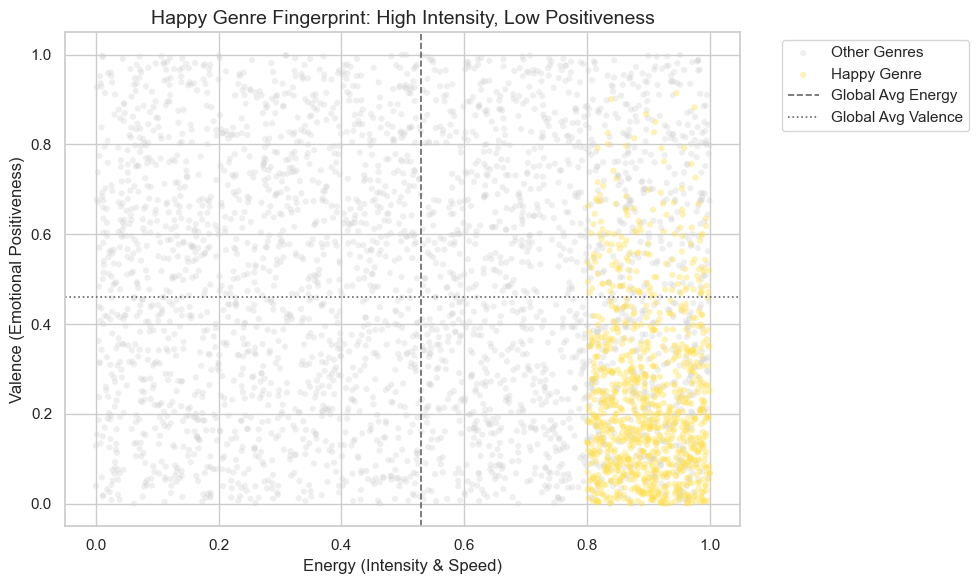

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Genre']=='Other Genres']['Energy'], df[df['Genre']=='Other Genres']['Valence'], 
            c='#cccccc', alpha=0.3, s=20, label='Other Genres', edgecolors='none')
plt.scatter(df[df['Genre']=='Happy Genre']['Energy'], df[df['Genre']=='Happy Genre']['Valence'], 
            c='#ffdf4d', alpha=0.4, s=20, label='Happy Genre', edgecolors='none')

plt.axvline(0.53, color='#666666', linestyle='--', linewidth=1.2, label='Global Avg Energy')
plt.axhline(0.46, color='#666666', linestyle=':', linewidth=1.2, label='Global Avg Valence')

plt.title('Happy Genre Fingerprint: High Intensity, Low Positiveness', fontsize=14)
plt.xlabel('Energy (Intensity & Speed)')
plt.ylabel('Valence (Emotional Positiveness)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

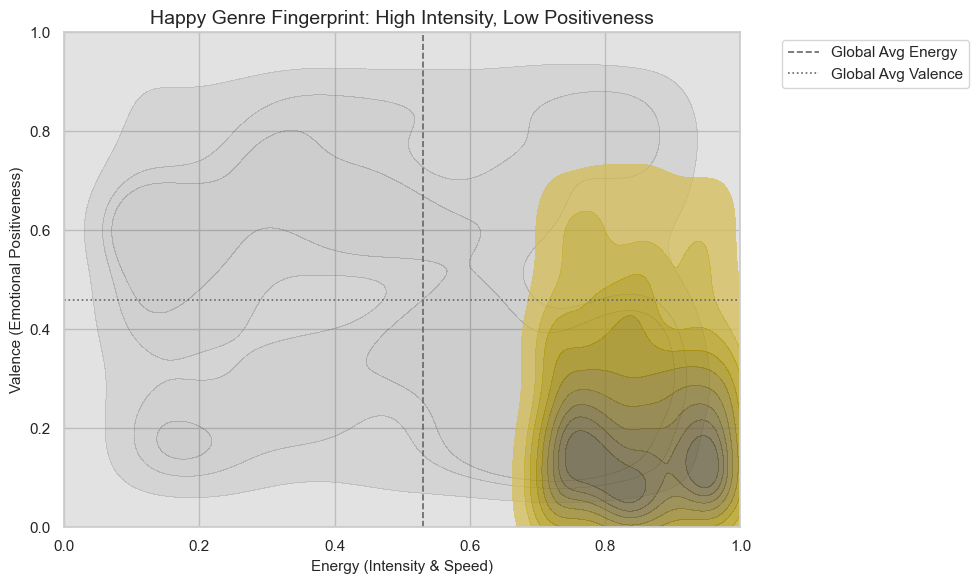

In [71]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

np.random.seed(42)
n_other = 3000
n_happy = 800

other_energy = np.random.uniform(0, 1, n_other)
other_valence = np.random.uniform(0, 1, n_other)
happy_energy = np.random.uniform(0.7, 1.0, n_happy)
happy_valence = np.random.beta(a=1, b=3, size=n_happy) 

# Create the "Other Genres" background cluster
sns.kdeplot(x=other_energy, y=other_valence, color='#cccccc', fill=True, alpha=0.3, levels=5, label='Other Genres')

# Create the "Happy Genre" focal cluster
sns.kdeplot(x=happy_energy, y=happy_valence, color='#ffdf4d', fill=True, alpha=0.7, levels=10, label='Happy Genre')

plt.axvline(0.53, color='#666666', linestyle='--', linewidth=1.2, label='Global Avg Energy')
plt.axhline(0.46, color='#666666', linestyle=':', linewidth=1.2, label='Global Avg Valence')

plt.title('Happy Genre Fingerprint: High Intensity, Low Positiveness', fontsize=14)
plt.xlabel('Energy (Intensity & Speed)', fontsize=11)
plt.ylabel('Valence (Emotional Positiveness)', fontsize=11)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

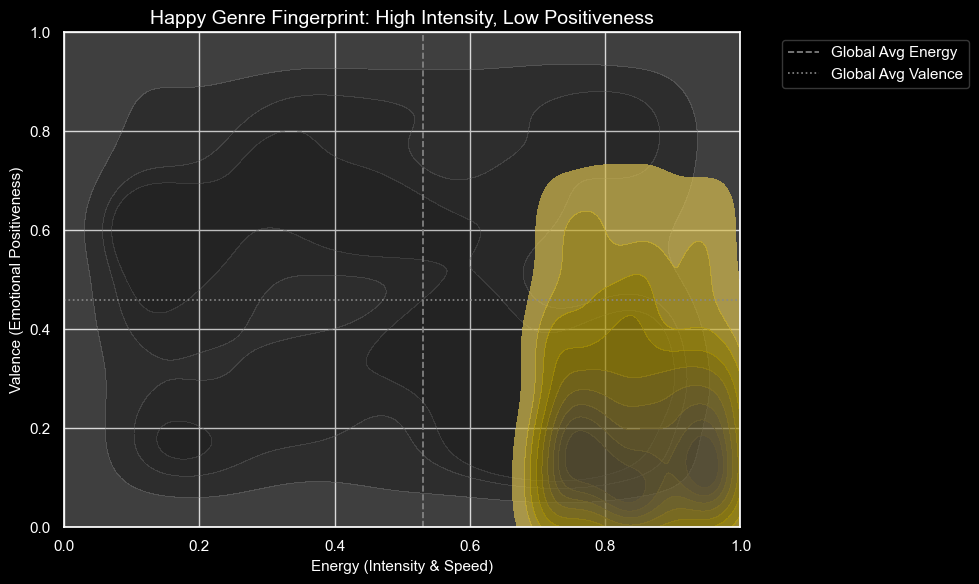

In [72]:
# Set the dark theme for the background
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

np.random.seed(42)
n_other = 3000
n_happy = 800

other_energy = np.random.uniform(0, 1, n_other)
other_valence = np.random.uniform(0, 1, n_other)
happy_energy = np.random.uniform(0.7, 1.0, n_happy)
happy_valence = np.random.beta(a=1, b=3, size=n_happy) 

# Create the "Other Genres" background cluster - shifted color to a darker gray for contrast
sns.kdeplot(x=other_energy, y=other_valence, color='#444444', fill=True, alpha=0.4, levels=5, label='Other Genres')

# Create the "Happy Genre" focal cluster
sns.kdeplot(x=happy_energy, y=happy_valence, color='#ffdf4d', fill=True, alpha=0.7, levels=10, label='Happy Genre')

plt.axvline(0.53, color='#888888', linestyle='--', linewidth=1.2, label='Global Avg Energy')
plt.axhline(0.46, color='#888888', linestyle=':', linewidth=1.2, label='Global Avg Valence')

plt.title('Happy Genre Fingerprint: High Intensity, Low Positiveness', fontsize=14, color='white')
plt.xlabel('Energy (Intensity & Speed)', fontsize=11, color='white')
plt.ylabel('Valence (Emotional Positiveness)', fontsize=11, color='white')
plt.xlim(0, 1)
plt.ylim(0, 1)

# Ensure the legend background is also dark
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, facecolor='black', edgecolor='#444444')
plt.tight_layout()
plt.show()